## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [3]:
# Note -  EDA will always be performed on training data

file_path = r"C:\Users\ashis\OneDrive\Desktop\flights-sagemaker-project\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-27,Mumbai,Hyderabad,02:35:00,04:05:00,90,0.0,No info,2754
1,Jet Airways,2019-06-09,Delhi,Cochin,14:00:00,12:35:00,1355,1.0,In-flight meal not included,10262
2,Spicejet,2019-05-06,Chennai,Kolkata,08:20:00,10:35:00,135,0.0,No check-in baggage included,3859
3,Air India,2019-05-24,Kolkata,Banglore,14:35:00,14:35:00,1440,1.0,No info,6528
4,Vistara,2019-03-12,Mumbai,Hyderabad,07:30:00,19:55:00,745,1.0,No info,12080
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-06,Delhi,Cochin,06:40:00,12:00:00,320,1.0,No info,5647
636,Jet Airways,2019-03-18,Banglore,New Delhi,16:55:00,23:00:00,365,1.0,No info,13555
637,Indigo,2019-03-06,Delhi,Cochin,07:30:00,21:00:00,810,1.0,No info,14871
638,Air Asia,2019-06-15,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No info,4282


In [4]:
train.dtypes

airline                str
date_of_journey        str
source                 str
destination            str
dep_time               str
arrival_time           str
duration             int64
total_stops        float64
additional_info        str
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                       str
date_of_journey    datetime64[us]
source                        str
destination                   str
dep_time           datetime64[us]
arrival_time       datetime64[us]
duration                    int64
total_stops               float64
additional_info               str
price                       int64
dtype: object

## 3. High-Level Summary of Data

In [6]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    str           
 1   date_of_journey  640 non-null    datetime64[us]
 2   source           640 non-null    str           
 3   destination      640 non-null    str           
 4   dep_time         640 non-null    datetime64[us]
 5   arrival_time     640 non-null    datetime64[us]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    str           
 9   price            640 non-null    int64         
dtypes: datetime64[us](3), float64(1), int64(2), str(4)
memory usage: 50.1 KB


In [7]:
train.describe(include="number") #As we only need for numeric variables  

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,606.492188,0.807813,9233.350000
std,466.500389,0.632160,4693.361127
min,75.000000,0.000000,1840.000000
25%,170.000000,0.000000,5498.000000
50%,505.000000,1.000000,8586.000000
75%,861.250000,1.000000,12384.000000
max,2245.000000,3.000000,52285.000000


- We have very extreme values in `duration` column (min. value - 75mins and max. value - 2245 mins)

In [8]:
(
    train
    .assign(total_stops = train["total_stops"].astype(str)) #total stops - categorical
    .describe(include=str)

)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640,640
unique,8,5,6,4,4
top,Jet Airways,Delhi,Cochin,1.0,No info
freq,225,277,277,364,505


- In `airline` column - Jet Airways occurs 225 times, that's almost 1/3rd times
- Most of the flights in our dataset started from Delhi
- `total_stops` has 1 as the most common value - 364/640 - 50% of values

## 4. High-level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(train) #Shows only columns that have the missing values 

,count,percentage
variable,,


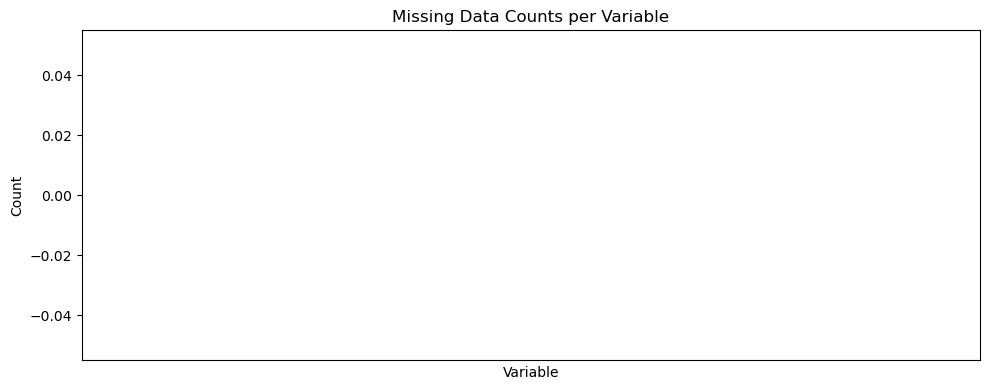

In [10]:
eda_helper_functions.plot_missing_info(train)

#Can use Missingno library as well

## 5. High-Level analysis of Outliers

In [11]:
# Can use an algorithm c/d isolation forest.
# - It is an ensemble algorithm with many trees (random forest)
# - Outliers will get isolated/captured at the top of the decision trees itself
# Return -1 - if outlier, 1 - not a outlier
# Note- isolation forest works on numeric variables - so look at numeric variables


In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    # .duration
    # .describe()
)

#Use query to filter anything

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Indigo,2019-05-27,Mumbai,Hyderabad,2026-02-18 02:35:00,2026-02-18 04:05:00,90,0.0,No info,2754,-1
1,Jet Airways,2019-09-06,Delhi,Cochin,2026-02-18 14:00:00,2026-02-18 12:35:00,1355,1.0,In-flight meal not included,10262,-1
2,Spicejet,2019-06-05,Chennai,Kolkata,2026-02-18 08:20:00,2026-02-18 10:35:00,135,0.0,No check-in baggage included,3859,-1
3,Air India,2019-05-24,Kolkata,Banglore,2026-02-18 14:35:00,2026-02-18 14:35:00,1440,1.0,No info,6528,-1
6,Jet Airways,2019-01-03,Banglore,New Delhi,2026-02-18 08:00:00,2026-02-18 07:40:00,1420,1.0,No info,22270,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-04-21,Kolkata,Banglore,2026-02-18 09:00:00,2026-02-18 11:25:00,145,0.0,No check-in baggage included,4439,-1
628,Jet Airways,2019-09-06,Kolkata,Banglore,2026-02-18 18:55:00,2026-02-18 20:45:00,1550,1.0,In-flight meal not included,10844,-1
629,Jet Airways,2019-06-03,Banglore,New Delhi,2026-02-18 11:40:00,2026-02-18 07:40:00,1200,1.0,No info,16736,-1
630,Jet Airways,2019-09-06,Delhi,Cochin,2026-02-18 05:30:00,2026-02-18 04:25:00,1375,2.0,In-flight meal not included,10368,-1


## 6. Pair Plots

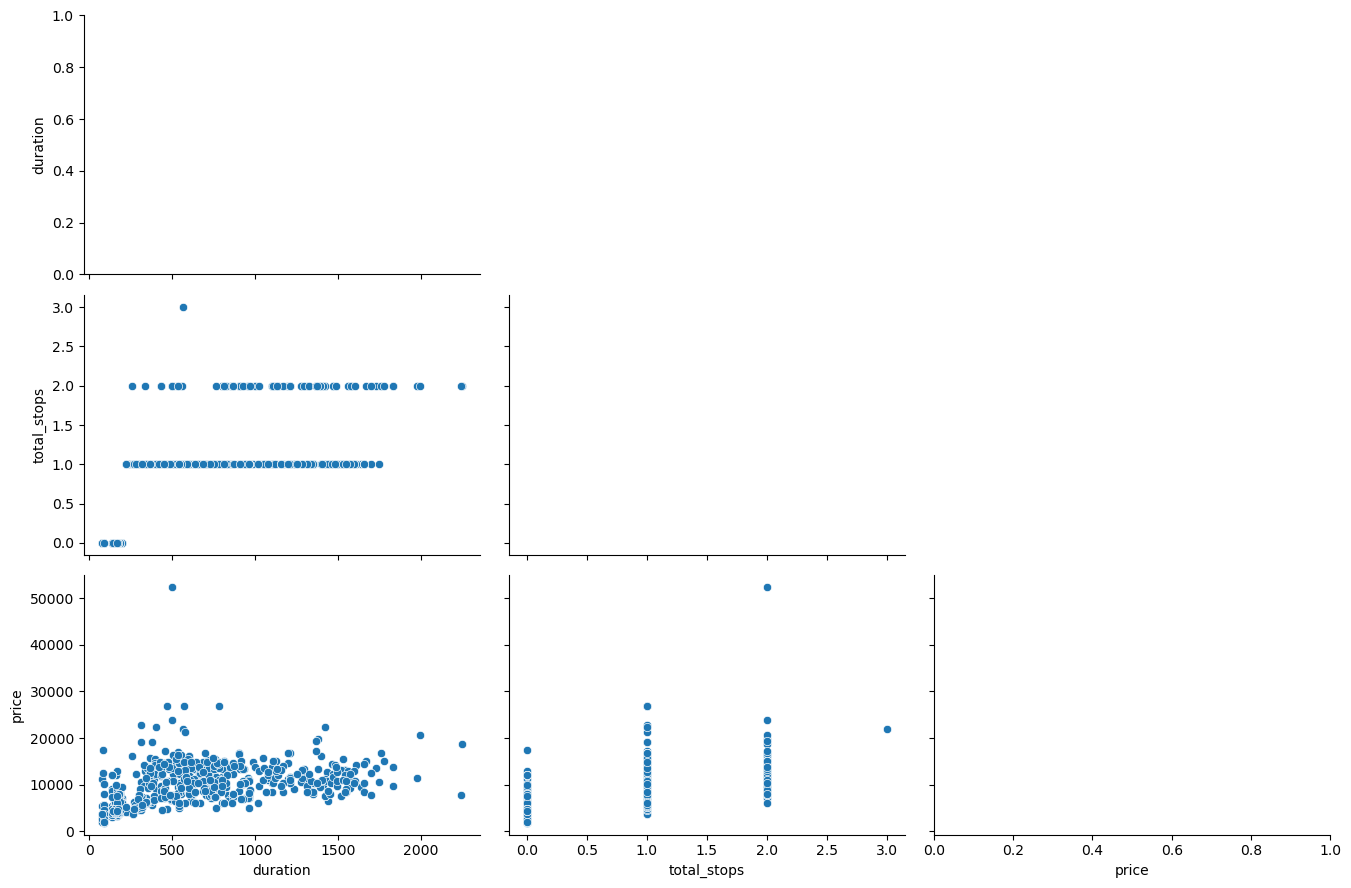

In [14]:
eda_helper_functions.pair_plots(train) # Pairwise scatter plots of numeric variables

- Linear relation b/w `duration` and `price` columns i.e longer the flights higher the price
- We can't infer much info b/w `total_stops` and `price` from this graph
- In `duration` vs `total_stop` we can see direct flights are for much less duration than the flights where there are 1 or >1 stops

## 7. Correlation Analysis

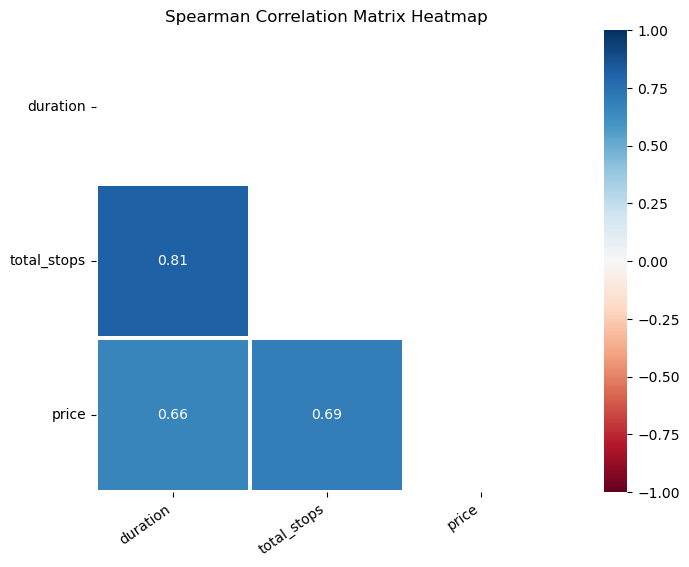

In [15]:
eda_helper_functions.correlation_heatmap(train) # For numerical variables


- We confirm this correlation b/w duration and price from plot and correlation value that as the duration increases, price also increases
- For price vs total_stops - Due to extreme values as we can see from the plot, the correlation values got influenced and we got higher correlation values.
- duration and total_stops have highest score, i.e. they are strongly correlated.
- We can't have such highly correlated features in linear models like Regression, Ridge, Lasso. Could be fine with Tree Based models.

In [16]:
correlation_matrix = train.corr(method='spearman', numeric_only=True)
correlation_matrix

,duration,total_stops,price
duration,1.000000,0.812512,0.657633
total_stops,0.812512,1.000000,0.687625
price,0.657633,0.687625,1.000000


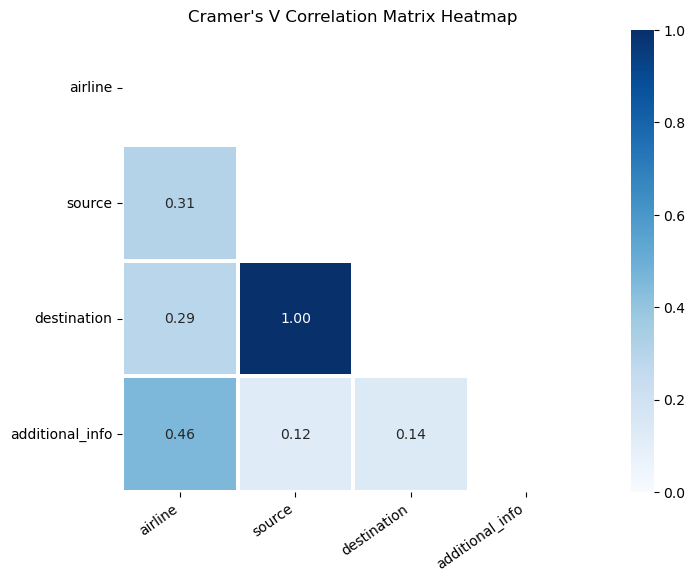

In [17]:
eda_helper_functions.cramersV_heatmap(train) # For Categorical variables (Based on chi-square test)

- Note - Here `source` and `destination` columns are having correlation 1 as they would be having many values overlapping, therefore not much relevant information.

## 8. Detailed Analysis

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='str')